# Foreign Direct Investment Analytics

## Problem Statement:

 Investment is a game of understanding historic data of investment objects under
 different events but it is still a game of chances to minimize the risk we apply analytics
 to find the equilibrium investment.
 
 To understand the Foreign direct investment in India for the last 17 years from 2000-01
 to 2016-17. This dataset contains sector and financial year-wise data of FDI in India
 Sector-wise investment analysis Year-wise investment analysis.
 
 Find key metrics and factors and show the meaningful relationships between
 attributes. Do your own research and come up with your finding

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load the dataset
fdi_data = pd.read_csv('FDI data.csv')

# Display the first few rows of the dataframe
fdi_data.head()


,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [3]:
fdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [4]:
fdi_data.info

<bound method DataFrame.info of                                                Sector  2000-01  2001-02  \
0                            METALLURGICAL INDUSTRIES    22.69    14.14   
1                                              MINING     1.32     6.52   
2                                               POWER    89.42   757.44   
3                             NON-CONVENTIONAL ENERGY     0.00     0.00   
4                                     COAL PRODUCTION     0.00     0.00   
..                                                ...      ...      ...   
58  PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...     0.00     0.00   
59                                               COIR     0.00     0.00   
60           CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES     0.00     0.00   
61  CONSTRUCTION DEVELOPMENT: Townships, housing, ...    24.33    51.75   
62                           MISCELLANEOUS INDUSTRIES   832.07   221.37   

    2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  

In [5]:
# Check for missing values
print("Missing values in each column:\n", fdi_data.isnull().sum())


Missing values in each column:
 Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64


In [6]:
# Check for unique values in 'Sector' to see if there are any inconsistencies
print("Unique sectors:\n", fdi_data['Sector'].unique())

Unique sectors:
 ['METALLURGICAL INDUSTRIES' 'MINING' 'POWER' 'NON-CONVENTIONAL ENERGY'
 'COAL PRODUCTION' 'PETROLEUM & NATURAL GAS'
 'BOILERS AND STEAM GENERATING PLANTS'
 'PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)' 'ELECTRICAL EQUIPMENTS'
 'COMPUTER SOFTWARE & HARDWARE' 'ELECTRONICS' 'TELECOMMUNICATIONS'
 'INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)'
 'AUTOMOBILE INDUSTRY' 'AIR TRANSPORT (INCLUDING AIR FREIGHT)'
 'SEA TRANSPORT' 'PORTS' 'RAILWAY RELATED COMPONENTS'
 'INDUSTRIAL MACHINERY' 'MACHINE TOOLS' 'AGRICULTURAL MACHINERY'
 'EARTH-MOVING MACHINERY'
 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES'
 'COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS'
 'MEDICAL AND SURGICAL APPLIANCES' 'INDUSTRIAL INSTRUMENTS'
 'SCIENTIFIC INSTRUMENTS' 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS'
 'FERTILIZERS' 'CHEMICALS (OTHER THAN FERTILIZERS)'
 'PHOTOGRAPHIC RAW FILM AND PAPER' 'DYE-STUFFS' 'DRUGS & PHARMACEUTICALS'
 'TEXTILES (INCLUDING DYED,PRINTED)'
 'PAPER AND PULP (INCLUDING P

## Interpretation of Unique Values
### Diverse Sectors: 
Your dataset covers a wide range of sectors from heavy industries like "METALLURGICAL INDUSTRIES" and "MINING" to services such as "EDUCATION" and "HOTEL & TOURISM". This diversity indicates the dataset captures a broad spectrum of the economy relevant to FDI.
### Specificity: 
Some sectors are very specific, such as "PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)" and "AIR TRANSPORT (INCLUDING AIR FREIGHT)", which suggests the data can provide detailed insights into FDI distributions within these niches.
### Complex Sectors: 
The sector "SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)" appears to be a composite of several sub-sectors, which could be problematic if you need to analyze these sub-sectors individually.

In [7]:
# Print sorted unique sectors to check for inconsistencies
print(sorted(fdi_data['Sector'].unique()))

# Strip any leading/trailing spaces and check again
fdi_data['Sector'] = fdi_data['Sector'].str.strip()
print(sorted(fdi_data['Sector'].unique()))


['AGRICULTURAL MACHINERY', 'AGRICULTURE SERVICES', 'AIR TRANSPORT (INCLUDING AIR FREIGHT)', 'AUTOMOBILE INDUSTRY', 'BOILERS AND STEAM GENERATING PLANTS', 'CEMENT AND GYPSUM PRODUCTS', 'CERAMICS', 'CHEMICALS (OTHER THAN FERTILIZERS)', 'COAL PRODUCTION', 'COIR', 'COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS', 'COMPUTER SOFTWARE & HARDWARE', 'CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES', 'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects', 'CONSULTANCY SERVICES', 'DEFENCE INDUSTRIES', 'DIAMOND,GOLD ORNAMENTS', 'DRUGS & PHARMACEUTICALS', 'DYE-STUFFS', 'EARTH-MOVING MACHINERY', 'EDUCATION', 'ELECTRICAL EQUIPMENTS', 'ELECTRONICS', 'FERMENTATION INDUSTRIES', 'FERTILIZERS', 'FOOD PROCESSING INDUSTRIES', 'GLASS', 'GLUE AND GELATIN', 'HOSPITAL & DIAGNOSTIC CENTRES', 'HOTEL & TOURISM', 'INDUSTRIAL INSTRUMENTS', 'INDUSTRIAL MACHINERY', 'INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)', 'LEATHER,LEATHER GOODS AND PICKERS', 'MACHINE TOOLS', 'MAT

In [8]:
# Basic statistical details
print("Statistical summary:\n", fdi_data.describe())

Statistical summary:
           2000-01     2001-02     2002-03     2003-04     2004-05  \
count   63.000000   63.000000   63.000000   63.000000   63.000000   
mean    37.757302   63.931587   42.925714   34.727778   51.090317   
std    112.227860  157.878737   86.606439   67.653735  101.934873   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.200000    0.215000    0.715000   
50%      4.030000    5.070000   11.010000    6.370000    9.090000   
75%     23.510000   44.830000   36.555000   38.660000   43.205000   
max    832.070000  873.230000  419.960000  368.320000  527.900000   

           2005-06      2006-07      2007-08      2008-09      2009-10  \
count    63.000000    63.000000    63.000000    63.000000    63.000000   
mean     87.932540   198.281905   390.085714   498.348571   410.069524   
std     206.436967   686.783115  1026.249935  1134.649040   926.814626   
min       0.000000     0.000000     0.000000     0.000000   

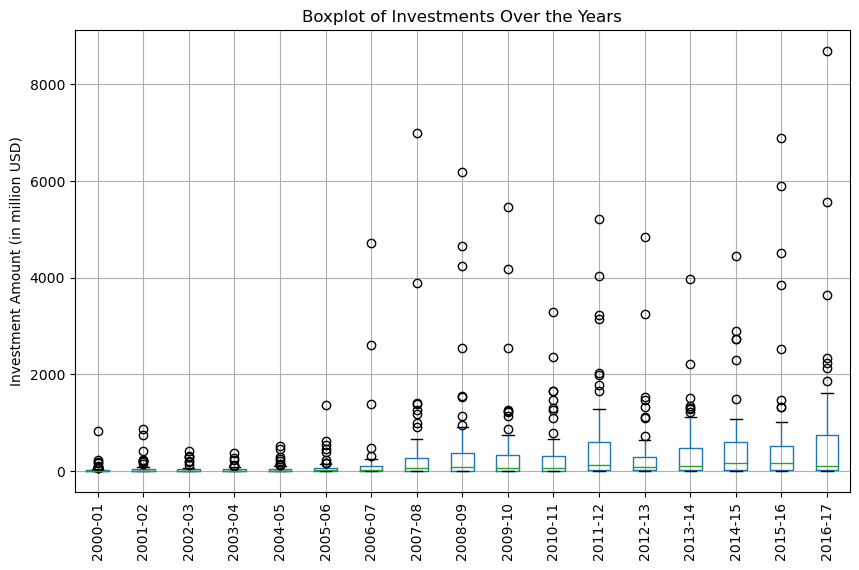

In [9]:
# Plotting some data to visualize potential outliers
plt.figure(figsize=(10, 6))
fdi_data.iloc[:, 1:].boxplot(rot=90)
plt.title('Boxplot of Investments Over the Years')
plt.ylabel('Investment Amount (in million USD)')
plt.show()

## Dealing with Outliers
Given that outliers represent real investment spikes, whether to exclude or include them in your analysis depends on project's goals:

### Include Outliers: 
If the aim is to understand all aspects of FDI, including peaks caused by significant one-time events, then keeping the outliers would be beneficial.

### Exclude Outliers for Specific Analyses: 
If focusing on typical investment behavior or trends, you might exclude these outliers to get a clearer picture of the general activity without the noise introduced by extreme values.

## Include Outliers
### Comprehensive Understanding: 
Including outliers will help in capturing all aspects of FDI, including significant investment spikes which could be due to major economic policies, international events, or strategic sectoral investments.
### Risk Analysis: 
Understanding these spikes is crucial for risk minimization. Large fluctuations in FDI can significantly impact economic planning and forecasting.
### Policy Impact: 
Major investments often occur due to policy changes or economic reforms. Including outliers can help identify the effectiveness or impact of such policies.

In [10]:
# Display summary statistics
print(fdi_data.describe())

          2000-01     2001-02     2002-03     2003-04     2004-05  \
count   63.000000   63.000000   63.000000   63.000000   63.000000   
mean    37.757302   63.931587   42.925714   34.727778   51.090317   
std    112.227860  157.878737   86.606439   67.653735  101.934873   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.200000    0.215000    0.715000   
50%      4.030000    5.070000   11.010000    6.370000    9.090000   
75%     23.510000   44.830000   36.555000   38.660000   43.205000   
max    832.070000  873.230000  419.960000  368.320000  527.900000   

           2005-06      2006-07      2007-08      2008-09      2009-10  \
count    63.000000    63.000000    63.000000    63.000000    63.000000   
mean     87.932540   198.281905   390.085714   498.348571   410.069524   
std     206.436967   686.783115  1026.249935  1134.649040   926.814626   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     

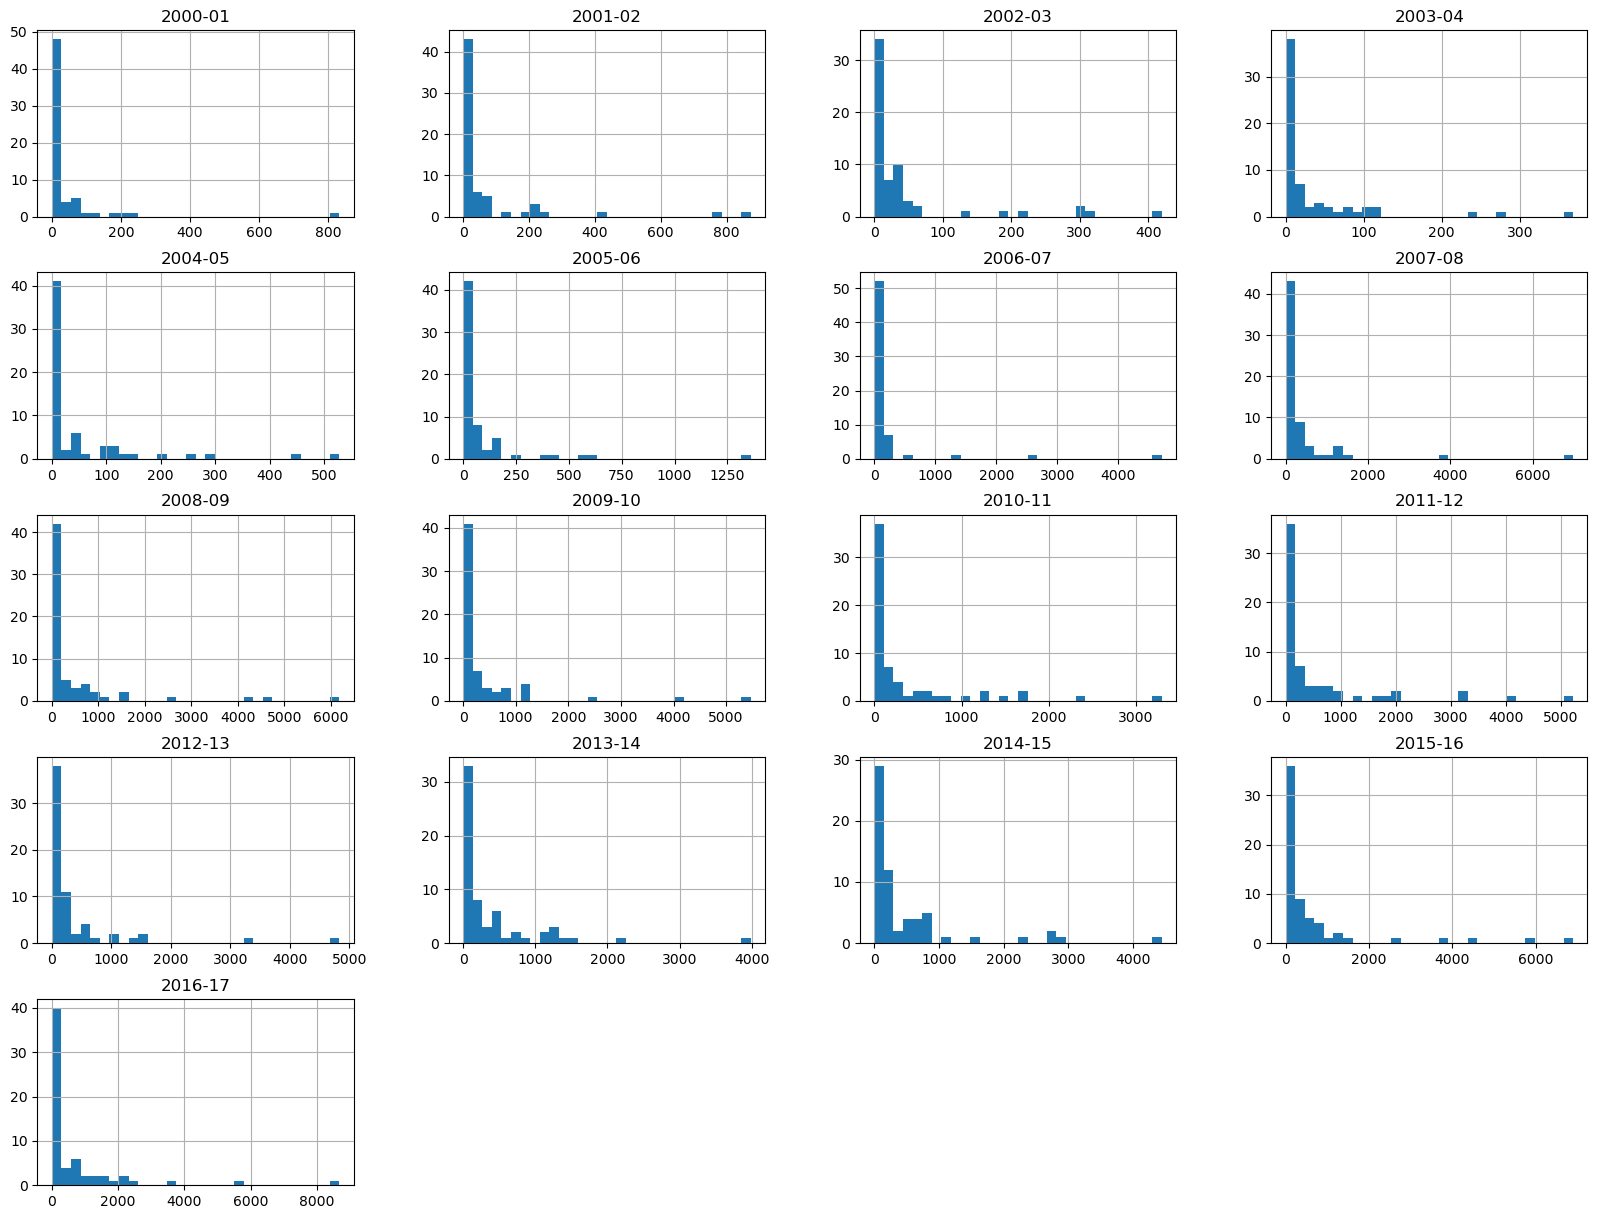

In [11]:


# Plot histograms
fdi_data.hist(bins=30, figsize=(20, 15))
plt.show()


### Interpretation:
The histograms show that the distribution of FDI amounts across all years is highly right-skewed, with most investments concentrated at lower values and a few significantly higher values indicating outliers. This pattern suggests that while most sectors receive relatively modest investments, certain sectors occasionally attract very large investments, causing these spikes.

In [12]:
fdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


# Exploratory Data Analysis 

## Line Plot of Yearly Total Investments

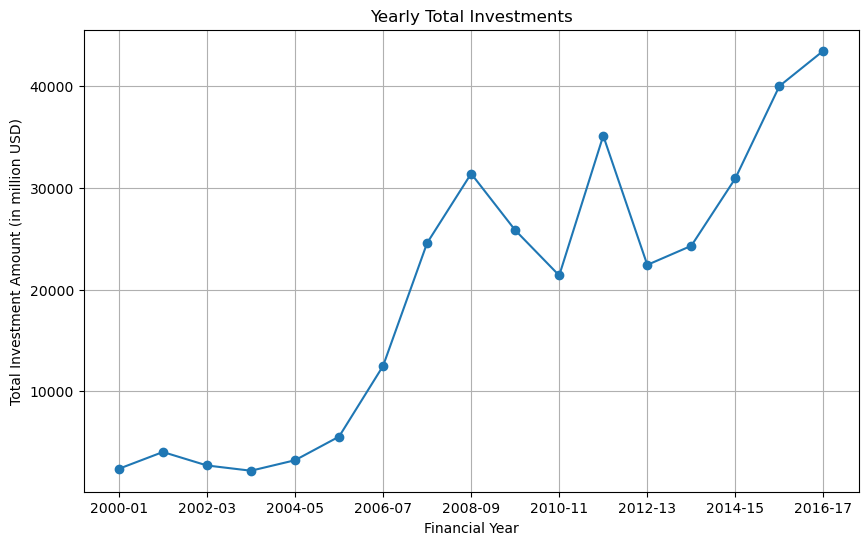

In [13]:
# Calculate yearly total investments
yearly_totals = fdi_data.iloc[:, 1:].sum()

# Line plot for yearly total investments
plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='line', marker='o')
plt.title('Yearly Total Investments')
plt.ylabel('Total Investment Amount (in million USD)')
plt.xlabel('Financial Year')
plt.grid(True)
plt.show()


### Interpretation:
The line plot shows a significant increase in total FDI in India from 2004-05 to 2008-09, followed by some fluctuations. After a dip around 2012-13, investments have consistently risen, peaking in 2016-17. This indicates an overall positive trend in FDI over the analyzed period.

## Total Investments by Sector (2000-01 to 2016-17)

In [14]:
# Sector-wise total investments
sector_totals = fdi_data.set_index('Sector').sum(axis=1)
print("Sector-wise total investments:\n", sector_totals)

Sector-wise total investments:
 Sector
METALLURGICAL INDUSTRIES                                                                                       10330.54
MINING                                                                                                          2271.83
POWER                                                                                                          11589.13
NON-CONVENTIONAL ENERGY                                                                                         5181.49
COAL PRODUCTION                                                                                                   27.74
                                                                                                                 ...   
PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY)                                                            634.66
COIR                                                                                                               4.06
C

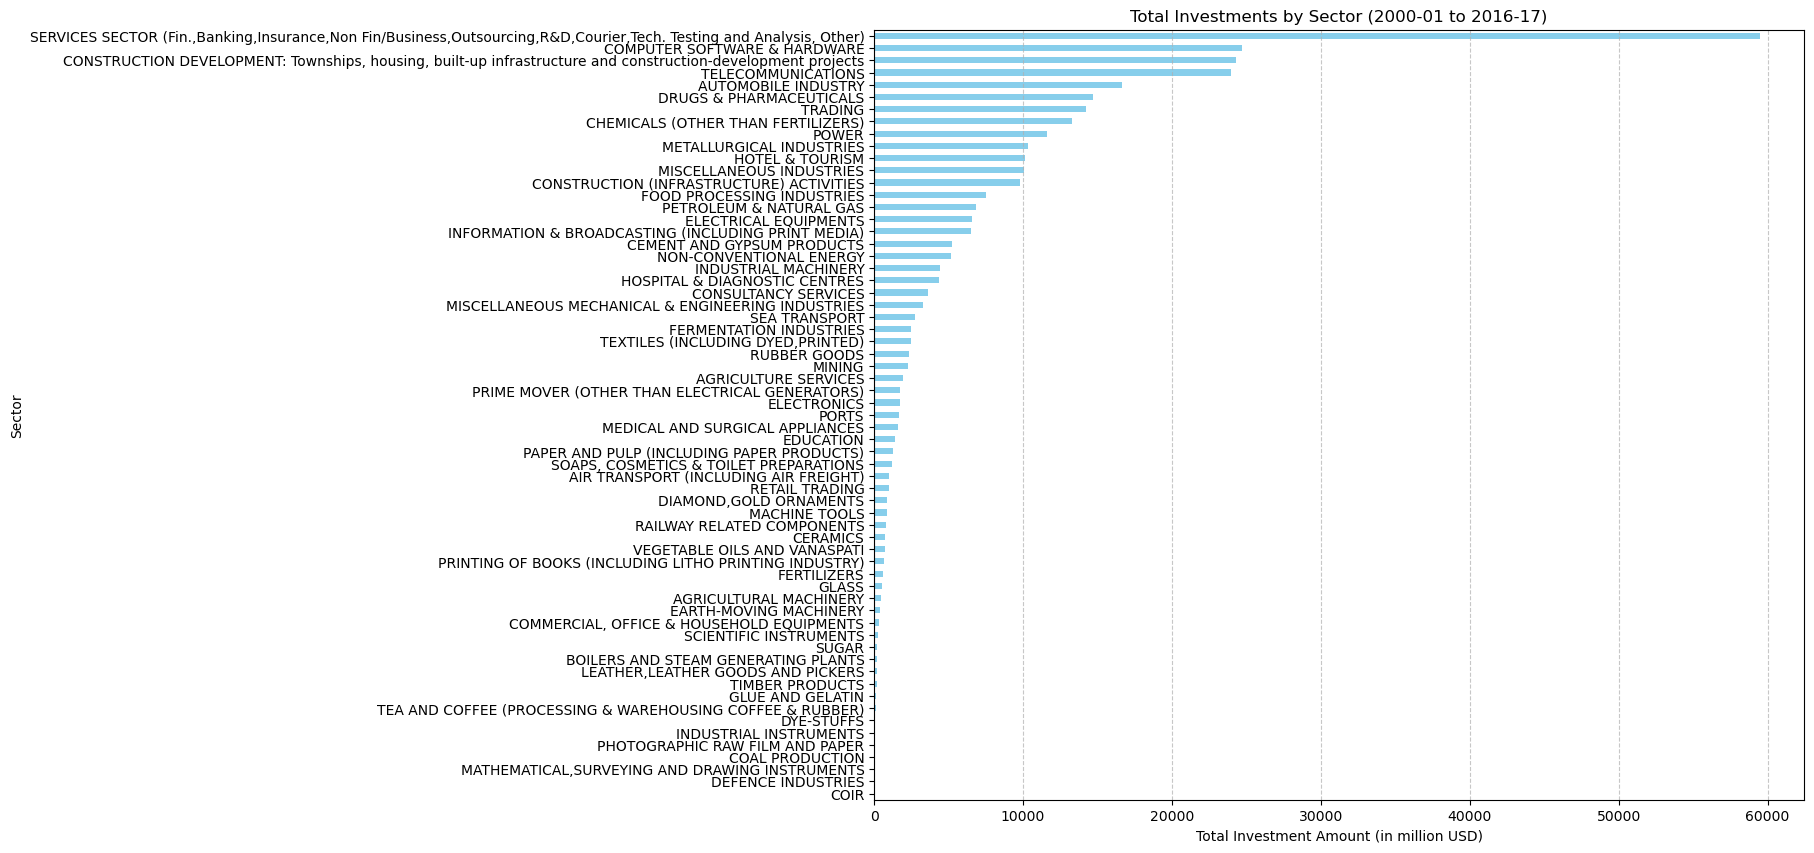

In [15]:
# Calculate sector-wise total investments
sector_totals = fdi_data.set_index('Sector').sum(axis=1)

# Sort the sectors by total investment for better visualization
sector_totals_sorted = sector_totals.sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(12, 10))
sector_totals_sorted.plot(kind='barh', color='skyblue')
plt.title('Total Investments by Sector (2000-01 to 2016-17)')
plt.xlabel('Total Investment Amount (in million USD)')
plt.ylabel('Sector')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest values on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Interpretation:

1. **Top Sectors**:
   - **Services Sector**: Received the highest total investment, indicating strong interest in finance, banking, insurance, and other services.
   - **Construction Development**: Significant investments in infrastructure projects like housing and townships.
   - **Computer Software & Hardware**: Major investments reflecting the importance of the tech sector.

2. **High Investment Sectors**:
   - **Telecommunications**, **Automobile Industry**, **Drugs & Pharmaceuticals**, and **Trading** also attracted substantial investments, showcasing their critical roles in the economy.

3. **Moderate Investment Sectors**:
   - Sectors like **Electrical Equipments**, **Food Processing**, **Chemicals**, and **Hotel & Tourism** received moderate investments, indicating steady growth.

4. **Low Investment Sectors**:
   - Sectors such as **Air Transport**, **Mining**, and **Agricultural Services** saw relatively lower investments, suggesting less focus during this period.

5. **Minimal Investment Sectors**:
   - Sectors including **Coir**, **Defence Industries**, and **Photographic Raw Film and Paper** received minimal investments, indicating limited interest.

### Key Takeaways

- The **Services Sector** and **Construction Development** are the biggest attractors of FDI.
- Technology and industrial sectors like **Computer Software & Hardware** and **Telecommunications** are also major recipients.
- Traditional and niche sectors received less investment, highlighting potential areas for policy focus or growth opportunities.

This visualization clearly shows which sectors have attracted the most foreign investment, providing insights into economic priorities and investment trends.

## Top 10 Sectors by Total Investment

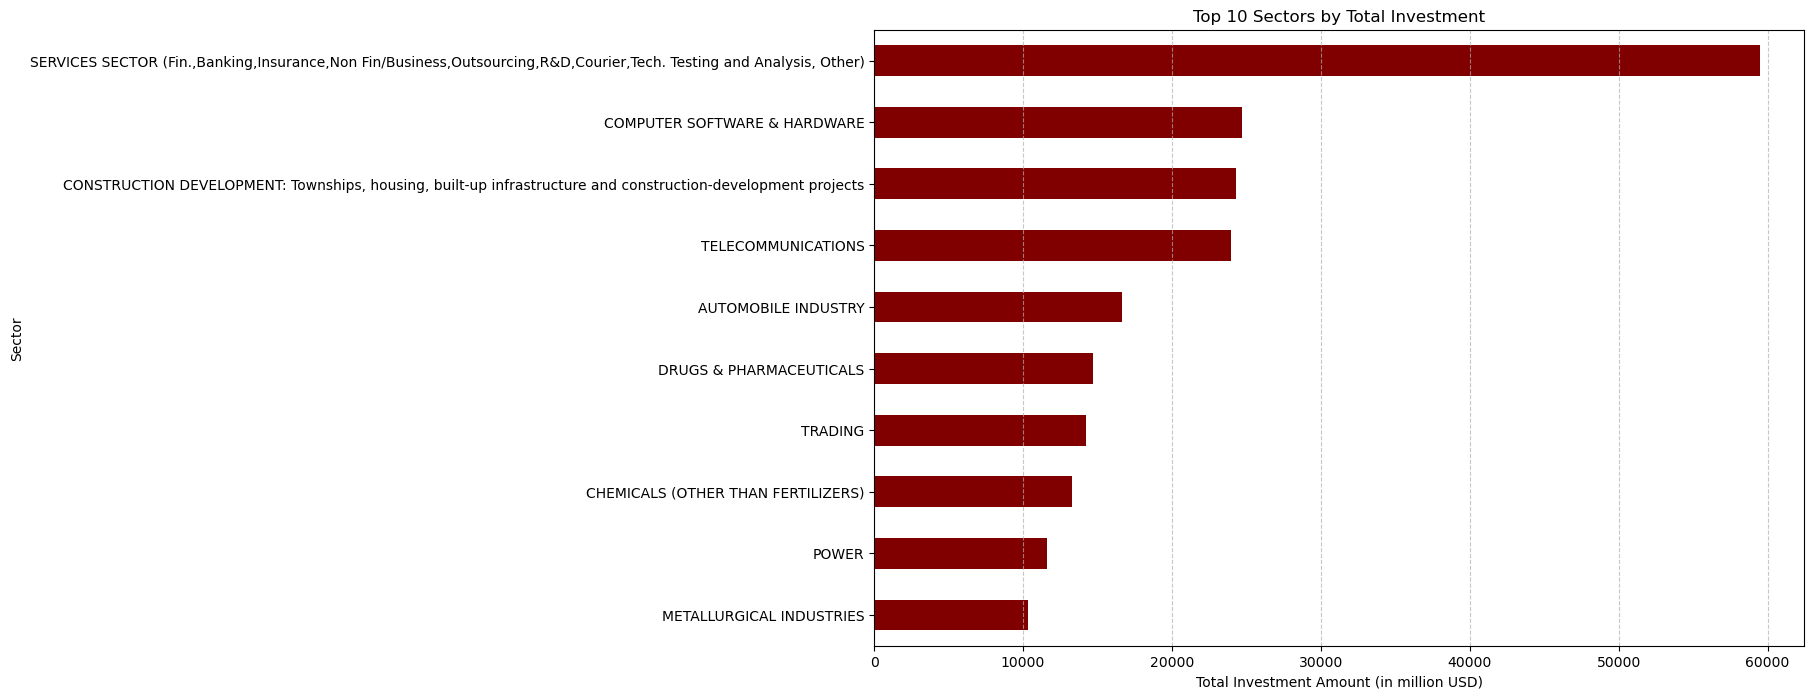

In [16]:
# Calculate total investments for each sector
sector_totals = fdi_data.set_index('Sector').sum(axis=1)

# Get the top 10 sectors
top_10_sectors = sector_totals.nlargest(10)

# Plot the top 10 sectors
plt.figure(figsize=(12, 8))
top_10_sectors.plot(kind='barh', color='maroon')
plt.title('Top 10 Sectors by Total Investment')
plt.xlabel('Total Investment Amount (in million USD)')
plt.ylabel('Sector')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

### Simplified Interpretation of Top 10 Sectors by Total Investment

1. **Services Sector**: Received the highest investment, indicating strong interest in finance, banking, insurance, and other services.
2. **Construction Development**: Significant investments in infrastructure projects like housing and townships.
3. **Computer Software & Hardware**: Major investments reflecting the importance of the tech sector.
4. **Telecommunications**: Attracted substantial investments, showing growth in communication technologies.
5. **Automobile Industry**: Significant investments highlighting its role in manufacturing and economic growth.
6. **Drugs & Pharmaceuticals**: Notable investments, indicating its importance in healthcare and exports.
7. **Trading**: Investments reflect the significance of commercial activities and distribution networks.
8. **Chemicals (Other Than Fertilizers)**: Substantial investments in the chemical industry.
9. **Power**: Significant investments in energy infrastructure development.
10. **Metallurgical Industries**: Investments highlight the importance of metals and materials production.

### Key Insights

- The **Services Sector** dominates FDI, showcasing its critical economic role.
- **Infrastructure** and **technology** sectors attract major investments, reflecting development needs and growth potential.
- **Healthcare** and **chemical** industries also receive significant investments, indicating their economic importance.

### Investment Trends in the Top 3 Sectors
### EDA Task: Analyze and visualize the investment trends over the years in the top 3 sectors by total investment.

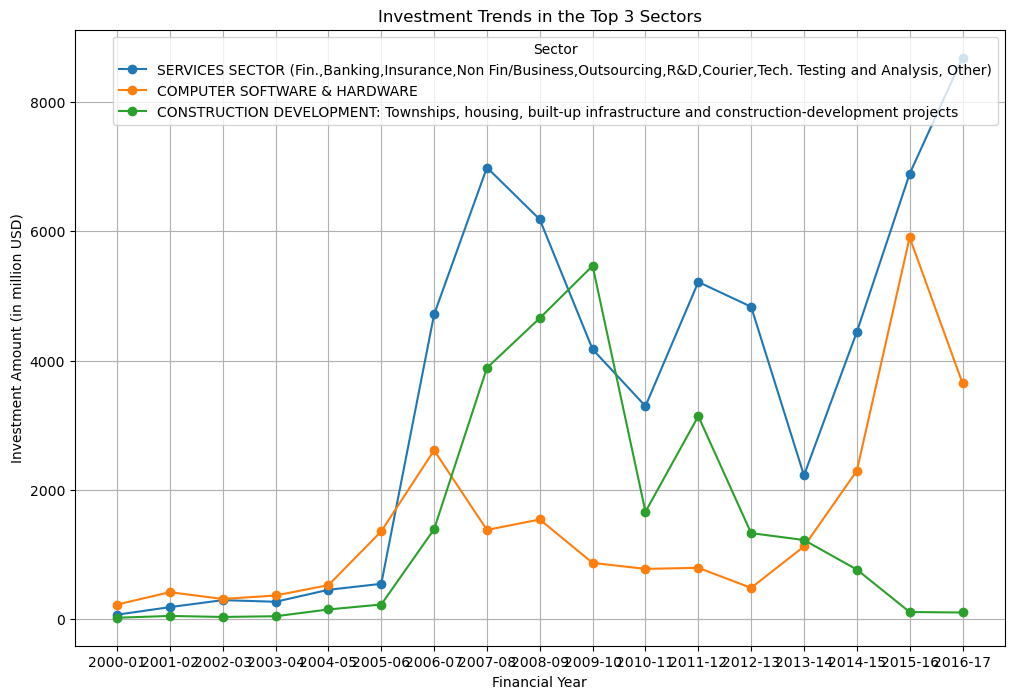

In [17]:
# Get the top 3 sectors by total investment
top_3_sectors = sector_totals.nlargest(3).index

# Extract investment data for the top 3 sectors
top_3_sectors_data = fdi_data[fdi_data['Sector'].isin(top_3_sectors)].set_index('Sector').T

# Plot the investment trends in the top 3 sectors
plt.figure(figsize=(12, 8))
for sector in top_3_sectors:
    plt.plot(top_3_sectors_data.index, top_3_sectors_data[sector], label=sector, marker='o', linestyle='-')

plt.title('Investment Trends in the Top 3 Sectors')
plt.xlabel('Financial Year')
plt.ylabel('Investment Amount (in million USD)')
plt.legend(title='Sector')
plt.grid(True)
plt.show()


### Interpretation of Investment Trends in the Top 3 Sectors

The plot shows the investment trends in the top 3 sectors by total investment over the period from 2000-01 to 2016-17. Here are the key insights:

1. **Services Sector**:
   - The Services Sector has seen the most significant and consistent growth in investments, particularly from 2006-07 onwards.
   - There was a notable peak around 2009-10 and another surge from 2014-15 onwards, indicating a strong upward trend in investment over the years.

2. **Computer Software & Hardware**:
   - This sector shows a significant rise starting around 2006-07, peaking in 2008-09, and then experiencing fluctuations.
   - Despite some ups and downs, it remains one of the top sectors for FDI.

3. **Construction Development**:
   - Investments in Construction Development show a steady increase starting around 2005-06, peaking in 2008-09, and then fluctuating with another peak around 2015-16.
   - This sector has experienced significant volatility in investments over the years.

### Overall Insight

- The Services Sector stands out as the most stable and highest-growing sector in terms of FDI, indicating sustained investor confidence and potential long-term opportunities.
- The Computer Software & Hardware sector, while also strong, shows more volatility, suggesting periods of rapid growth followed by corrections.
- Construction Development has seen substantial investment, though with high volatility, pointing to both significant opportunities and risks.

This analysis helps investors understand the long-term trends and volatility associated with these top sectors, aiding in making informed investment decisions.

## Cumulative Investments Over Time

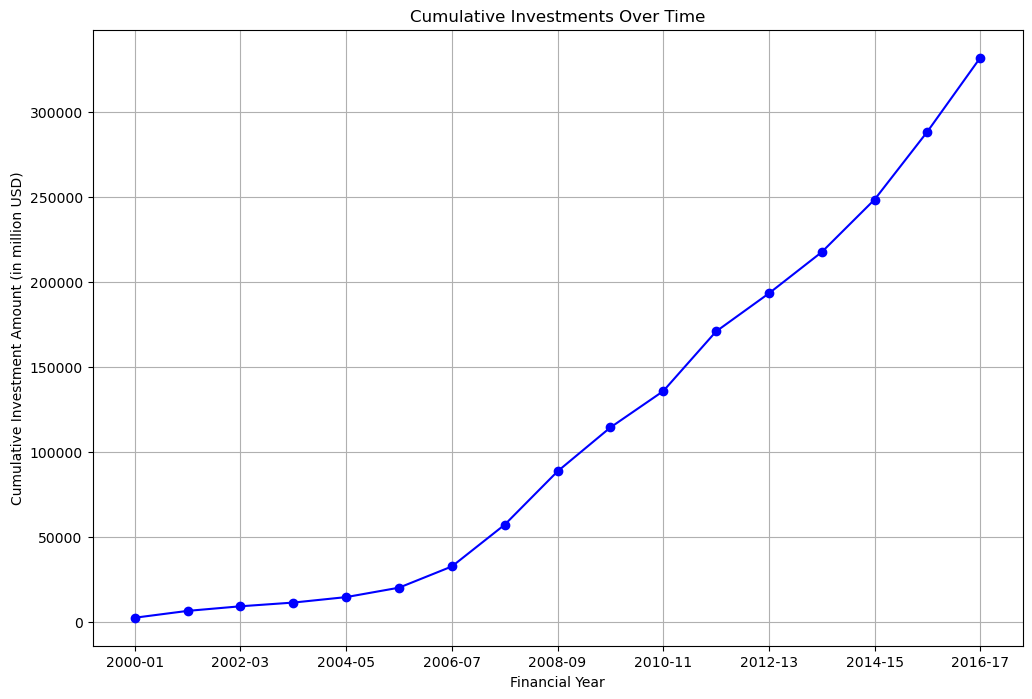

In [18]:
# Calculate cumulative investments for each year
cumulative_investments = fdi_data.set_index('Sector').cumsum(axis=1).sum()

# Plot cumulative investments over time
plt.figure(figsize=(12, 8))
cumulative_investments.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Cumulative Investments Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Cumulative Investment Amount (in million USD)')
plt.grid(True)
plt.show()


### Interpretation:
The plot shows the cumulative investments in FDI over the period from 2000-01 to 2016-17. Here are the key insights:

1. **Steady Growth**:
   - The cumulative investment amount shows a steady and significant increase over time.
   - This indicates that foreign direct investments in India have been growing consistently over the years.

2. **Acceleration Post-2005**:
   - There is a noticeable acceleration in the cumulative investment amount starting around 2005-06.
   - This suggests that the rate of investment significantly increased during this period.

3. **Exponential Growth**:
   - The curve of cumulative investments appears to be exponential, indicating that not only the amount but also the growth rate of investments has been increasing over time.
   - This exponential trend continues through to 2016-17, reaching over 300,000 million USD.

### Overall Insight

- The consistent upward trajectory of cumulative investments highlights sustained investor confidence in the Indian market.
- The period post-2005 shows a sharp increase in investment inflow, suggesting favorable economic or policy conditions during that time.

This analysis helps investors and policymakers understand the long-term trend of FDI inflows into India, indicating robust and growing foreign investment interest in the country.

## Trends over the years for each sector

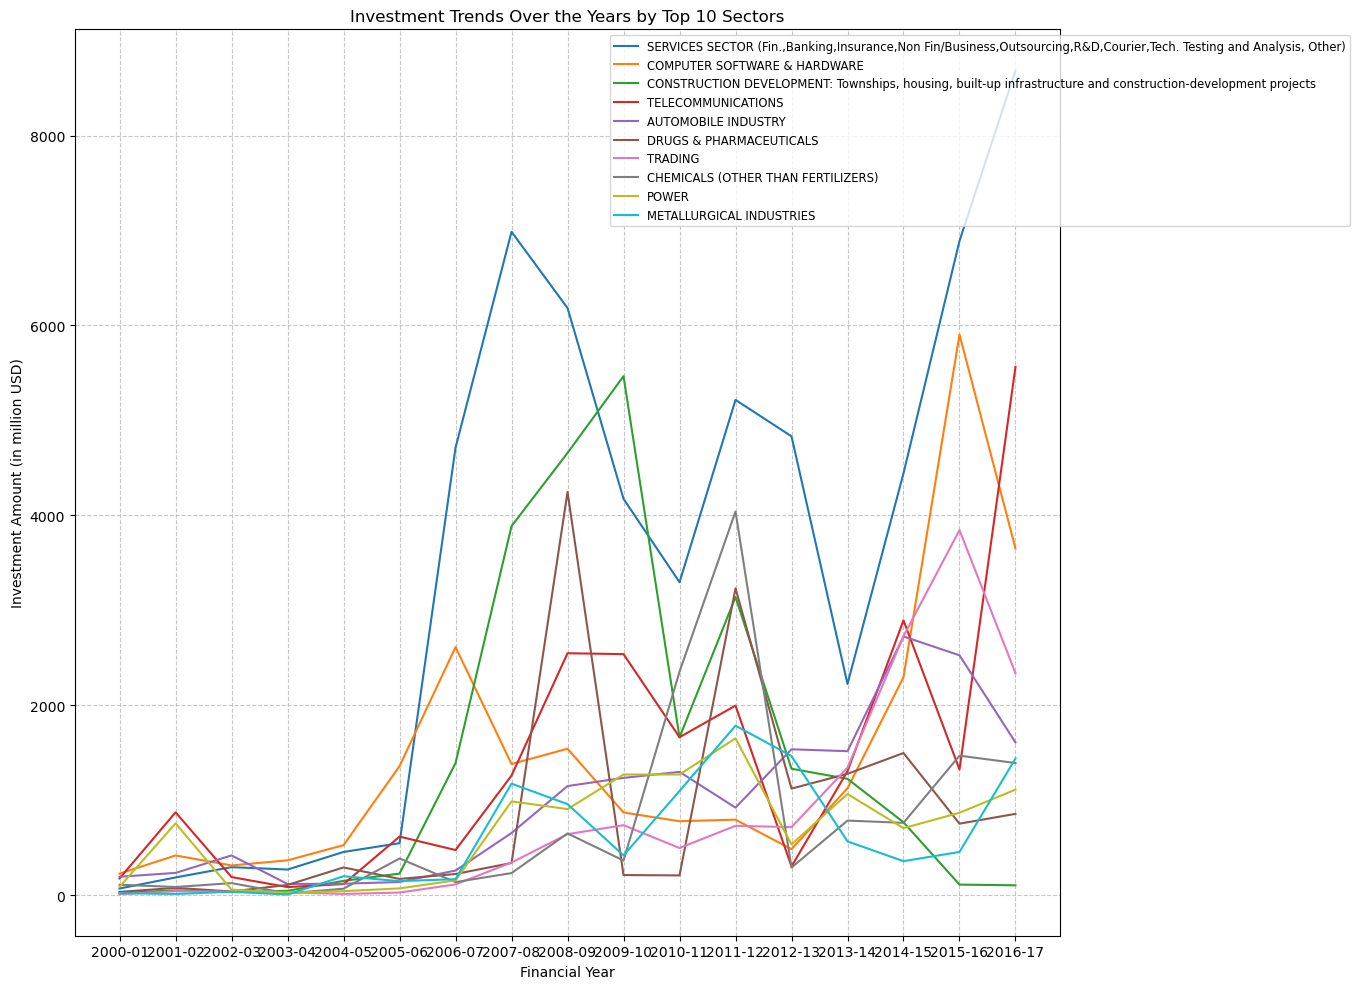

In [20]:


# Assuming fdi_data_transposed is already prepared
fdi_data_transposed = fdi_data.set_index('Sector').T

plt.figure(figsize=(14, 10))

# Limit the number of sectors to avoid clutter (example: top 10 sectors)
top_sectors = fdi_data_transposed.sum().sort_values(ascending=False).head(10).index

for sector in top_sectors:
    plt.plot(fdi_data_transposed.index, fdi_data_transposed[sector], label=sector, linewidth=1.5)

plt.title('Investment Trends Over the Years by Top 10 Sectors')
plt.ylabel('Investment Amount (in million USD)')
plt.xlabel('Financial Year')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The line plot shows the investment trends over the years by the top 10 sectors based on the investment amount. Here are the key interpretations from the plot:

1. **Services Sector**: This sector has consistently attracted the highest investments over the years, with notable peaks around 2007-08 and 2016-17. This indicates the importance and growth potential of the services sector in the economy.

2. **Computer Software & Hardware**: Investments in this sector show significant peaks, particularly around 2008-09 and 2015-16, reflecting the growing demand and expansion in the IT industry.

3. **Construction Development**: This sector experienced a sharp increase in investments around 2007-08, which could be linked to infrastructural development initiatives during that period.

4. **Telecommunications**: There are noticeable peaks in investment around 2007-08 and 2013-14, indicating periods of significant growth and technological advancements in the telecom sector.

5. **Automobile Industry**: This sector shows a steady increase in investments, with peaks around 2012-13 and 2016-17, reflecting the industry's expansion and innovation efforts.

6. **Drugs & Pharmaceuticals**: Investments in this sector have been relatively stable, with minor peaks around 2008-09 and 2013-14, indicating steady growth and development in the pharmaceutical industry.

7. **Trading**: There is a notable peak around 2008-09, reflecting a period of increased trading activities.

8. **Chemicals (Other than Fertilizers)**: This sector shows steady investment trends with minor peaks, indicating consistent interest in chemical industries.

9. **Power**: The power sector has seen fluctuations in investments, with peaks around 2010-11 and 2013-14, reflecting periods of increased focus on energy and power projects.

10. **Metallurgical Industries**: Investments in this sector have been relatively stable with some fluctuations, indicating moderate growth.

Overall, the plot highlights the dynamic nature of investments across different sectors, with the services sector consistently leading the way. Peaks in certain years indicate periods of significant growth and development within specific industries.

### Year with the Most Investment
### Identify which year received the highest total investment.

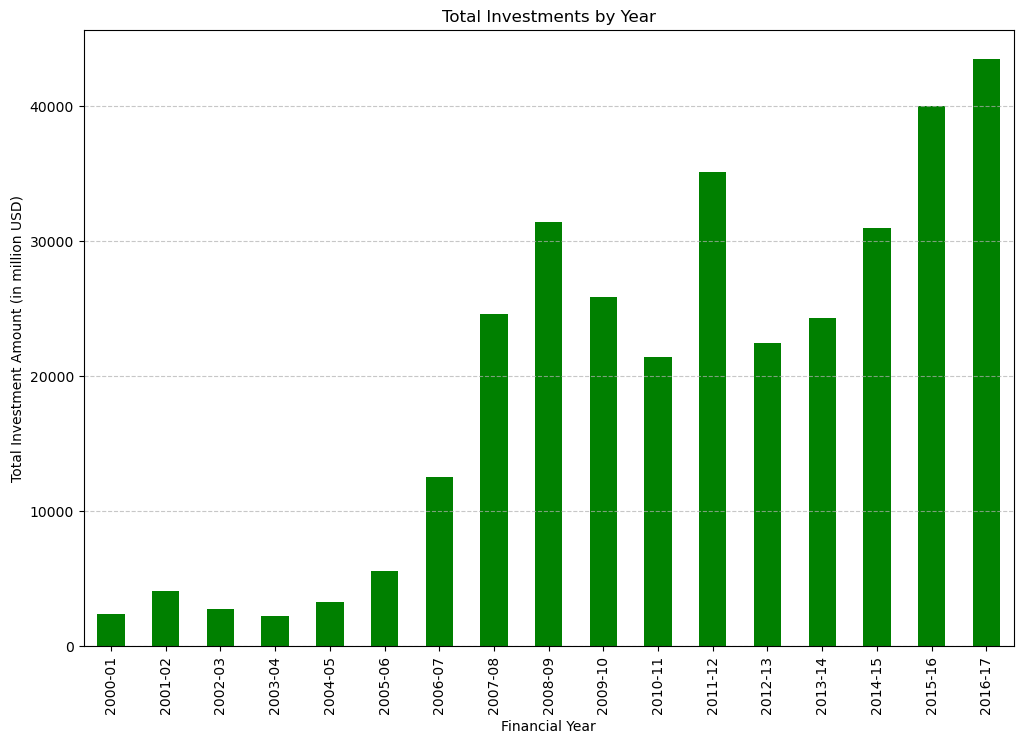

The year with the most investment is 2016-17 with an investment amount of 43478.26 million USD.


In [20]:
# Calculate total investments for each year
yearly_totals = fdi_data.set_index('Sector').sum()

# Get the year with the highest total investment
max_investment_year = yearly_totals.idxmax()
max_investment_amount = yearly_totals.max()

# Plot total investments by year
plt.figure(figsize=(12, 8))
yearly_totals.plot(kind='bar', color='green')
plt.title('Total Investments by Year')
plt.xlabel('Financial Year')
plt.ylabel('Total Investment Amount (in million USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"The year with the most investment is {max_investment_year} with an investment amount of {max_investment_amount:.2f} million USD.")


### Interpretation 

1. **Upward Trend**:
   - The plot shows a general upward trend in total investments from 2000-01 to 2016-17, with significant increases starting around 2006-07.

2. **Peaks and Valleys**:
   - Notable peaks are observed in 2008-09, 2011-12, and 2016-17, indicating years of particularly high investment.
   - There are also valleys, such as in 2009-10 and 2012-13, where investments dipped compared to the previous years.

3. **Record Year**:
   - The highest total investment was recorded in 2016-17, reaching over 40,000 million USD.

This analysis highlights the substantial growth in FDI over the years, with some fluctuations, and emphasizes 2016-17 as a standout year for investments.

## Yearly Growth Rate of Total Investments 

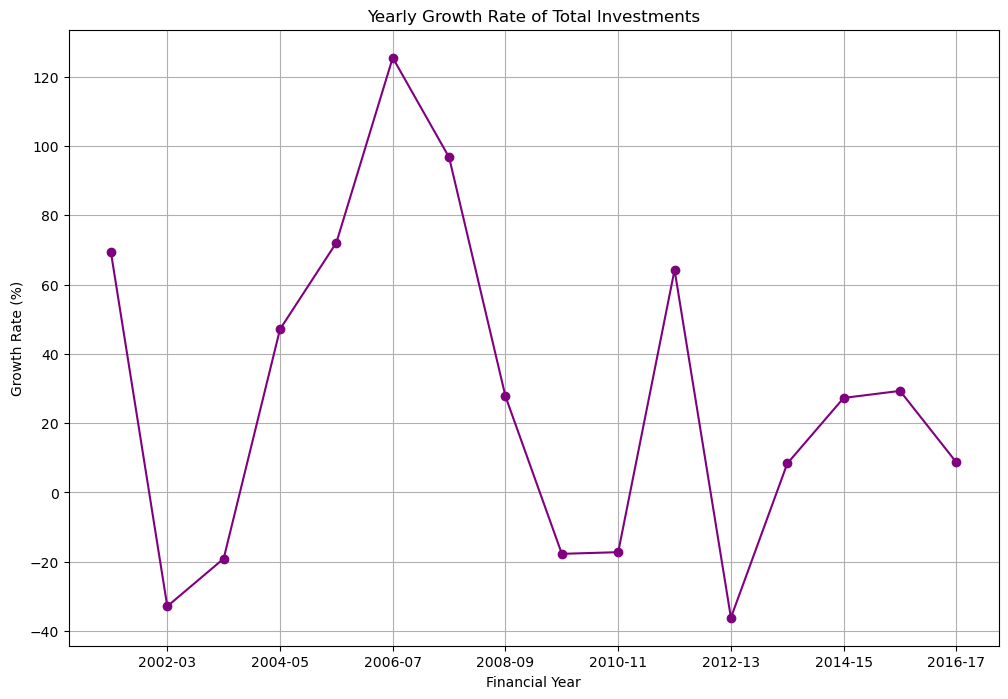

In [21]:
# Calculate yearly total investments
yearly_totals = fdi_data.set_index('Sector').sum()

# Calculate yearly growth rate
yearly_growth_rate = yearly_totals.pct_change() * 100

# Plot yearly growth rate
plt.figure(figsize=(12, 8))
yearly_growth_rate.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Yearly Growth Rate of Total Investments')
plt.xlabel('Financial Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


### Interpretation:
The plot illustrates the yearly growth rate of total investments from 2001-02 to 2016-17. Here are the key points:

1. **High Volatility**:
   - The yearly growth rates exhibit significant volatility, with both positive and negative spikes.

2. **Periods of High Growth**:
   - Notable peaks in growth are seen in 2006-07 (around 120%), 2009-10 (around 80%), and 2010-11 (around 80%).
   - These peaks suggest periods of rapid investment increase.

3. **Negative Growth**:
   - There are years with negative growth, such as 2002-03 (around -30%) and 2012-13 (around -40%).
   - These dips indicate years where total investments declined compared to the previous year.

4. **Recovery Trends**:
   - After periods of negative growth, there are often strong recovery trends, such as after 2002-03 and 2012-13.

### Overall Insight

- The FDI inflows to India have experienced substantial fluctuations, indicating varying investor confidence and possibly external economic factors influencing these trends.
- Despite the volatility, there are several periods of strong growth, underscoring the potential for significant investment opportunities.

This analysis highlights the importance of understanding the factors driving these changes to better predict future investment trends.

## Correlation Matrix of Investments Over the Years 

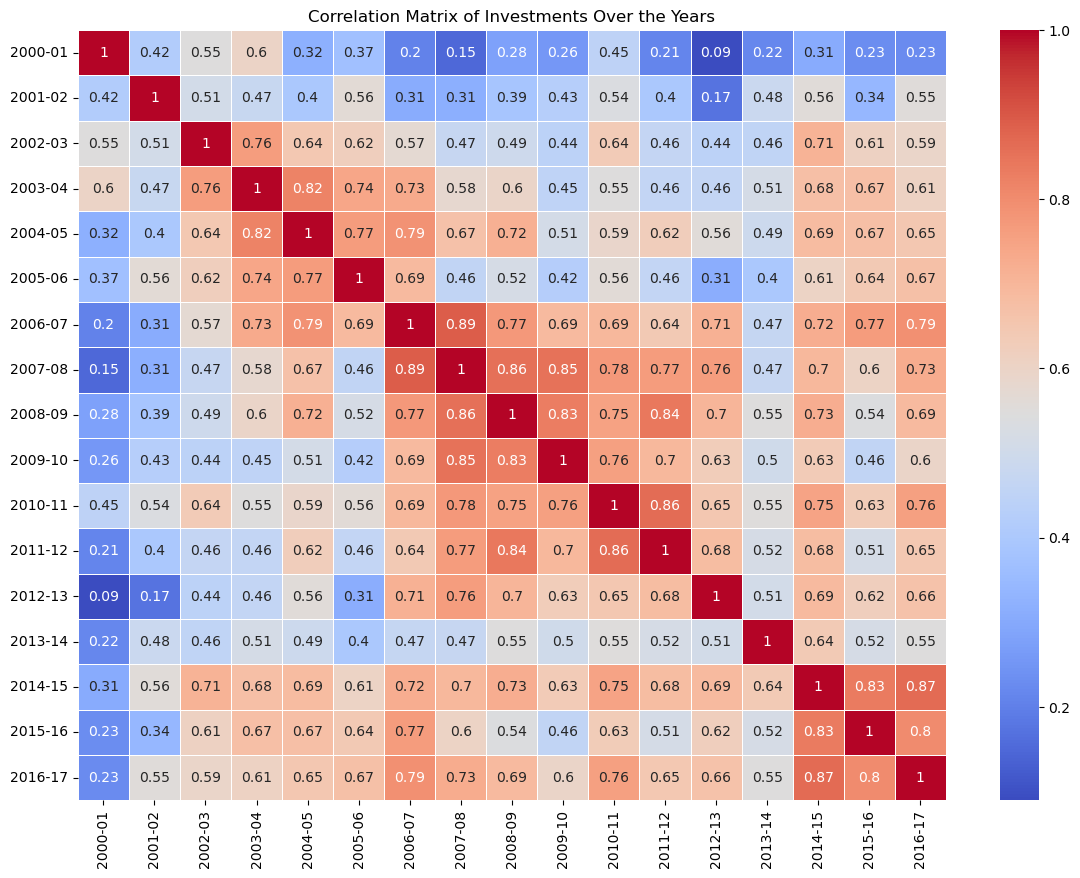

In [22]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = fdi_data.iloc[:, 1:].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Investments Over the Years')
plt.show()


### Interpretation of the Correlation Matrix

1. **High Positive Correlation**:
   - Values close to 1 indicate a strong positive correlation, meaning investments in those years tend to increase or decrease together.
   - **Notable High Correlations**:
     - **2005-06 to 2006-07**: Strong correlation (0.89).
     - **2007-08 to 2008-09**: Very high correlation (0.86).
     - **2014-15 to 2015-16**: High correlation (0.83).
     - **2015-16 to 2016-17**: Very high correlation (0.87).

2. **Moderate Positive Correlation**:
   - Values between 0.5 and 0.8 indicate a moderate positive correlation.
   - Many years exhibit moderate correlations, indicating that while investments tend to follow similar patterns across years, the relationship is not as strong as in the highly correlated pairs.

3. **Low or Negative Correlation**:
   - Values close to 0 or negative values indicate little to no correlation, or even inverse relationships.
   - **Notable Low/Negative Correlations**:
     - **2000-01 with several later years**: Generally low correlations, suggesting that investment patterns in 2000-01 did not strongly influence subsequent years.

4. **Periods of Stronger Correlation**:
   - Certain blocks of years show stronger internal correlations. For example:
     - **2005-06 to 2009-10**: These years show strong correlations with each other, indicating consistent investment patterns during this period.
     - **2011-12 to 2016-17**: Another period with strong internal correlations, suggesting that investment trends were more stable or influenced by similar factors during these years.

5. **Implications**:
   - **Stable Periods**: Years with high correlations suggest periods of stability in investment trends, possibly influenced by favorable economic conditions or consistent policy environments.
   - **Transition Periods**: Years with low correlations might indicate transition periods where investment strategies or external conditions changed significantly.

### Key Insights

- **Investment Stability**: Periods with high correlations (like 2005-06 to 2009-10 and 2011-12 to 2016-17) indicate stable and consistent investment trends. This could be due to sustained economic policies or global economic conditions that encouraged steady investment.
- **Fluctuations and Changes**: Lower correlations, particularly involving the early 2000s, suggest fluctuations or changes in investment patterns, possibly due to economic reforms, policy changes, or global financial conditions.
- **Strategic Planning**: Understanding these correlations helps in strategic planning, as it highlights periods of stability and potential volatility, assisting policymakers and investors in making informed decisions.

This correlation matrix provides a comprehensive view of how investment patterns in different years relate to each other, offering valuable insights for economic analysis and forecasting.

# Business Problems

## Investment Diversification Analysis
### Business Problem: "How diversified are FDI investments across different sectors, and has this diversification changed over time?"

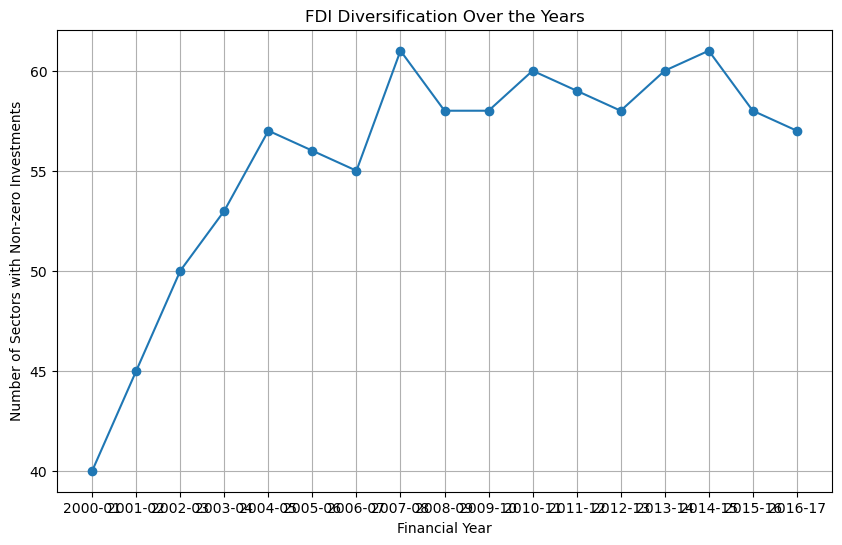

In [23]:
# Calculate yearly diversification as the number of sectors with non-zero investments
diversification = (fdi_data.iloc[:, 1:] > 0).sum(axis=0)

# Plot diversification over the years
plt.figure(figsize=(10, 6))
plt.plot(diversification.index, diversification.values, marker='o', linestyle='-')
plt.title('FDI Diversification Over the Years')
plt.ylabel('Number of Sectors with Non-zero Investments')
plt.xlabel('Financial Year')
plt.grid(True)
plt.show()

## Interpretation:
1. **Trend Analysis**: 
    - From 2000-01 to 2004-05, there is a clear upward trend in the number of sectors with non-zero FDI investments, indicating increasing diversification.
    - The peak diversification is observed in 2007-08 with about 61 sectors receiving FDI.
    - After 2007-08, there's a noticeable fluctuation, with the number of sectors oscillating around 55-60 sectors with some dips and rises over the years.

2. **Stability Post-2008**: 
    - Post-2008, the diversification seems to have reached a plateau with minor fluctuations, suggesting that the number of sectors attracting FDI stabilized around 55-60 sectors.
    - The slight decrease in 2016-17 indicates a potential concern or shift in FDI strategy or external factors affecting investments.

3. **Economic Impact**:
    - The period of growth until 2007-08 suggests a favorable economic environment or policies that encouraged FDI diversification.
    - Post-2008, the relative stability could be due to established sectors continuously attracting FDI or global economic conditions limiting further diversification.

## Solutions and Takeaways:
1. **Policy Enhancements**:
    - **Encouraging New Sectors**: To enhance FDI diversification further, policies could be introduced to attract investments in emerging or under-represented sectors.
    - **Improving Existing Policies**: Review and improve existing FDI policies to ensure they are still relevant and attractive to foreign investors.

2. **Market Research**:
    - Conduct market research to understand why certain sectors are not attracting FDI and address those gaps.
    - Identify global trends and align national FDI strategies with these trends to attract investments in futuristic sectors like technology, renewable energy, etc.

3. **Economic Stability**:
    - Work towards maintaining and improving economic stability to ensure continuous attractiveness to foreign investors.
    - Address any post-2008 economic issues that may have led to the observed stabilization in sector diversification.

4. **Incentives**:
    - Provide specific incentives for investments in sectors that have seen a decline or lack of growth in FDI.
    - Tailored incentive programs for high-growth potential but low-investment sectors to boost their attractiveness.

5. **Monitoring and Feedback**:
    - Establish a robust monitoring mechanism to continuously track FDI flows and sectoral diversification.
    - Gather feedback from investors to understand their concerns and improve the investment climate accordingly.

## Conclusion:
The analysis of FDI diversification over the years shows an initial growth phase followed by a period of stabilization. To ensure continuous growth and diversification, proactive measures such as policy improvements, market research, economic stability, targeted incentives, and robust monitoring are essential. Addressing these areas can help attract FDI into a broader range of sectors, fostering economic growth and development.

## Identification of Emerging Sectors
### Business Problem: "Which sectors have shown recent significant increases in FDI, indicating emerging investment trends?"

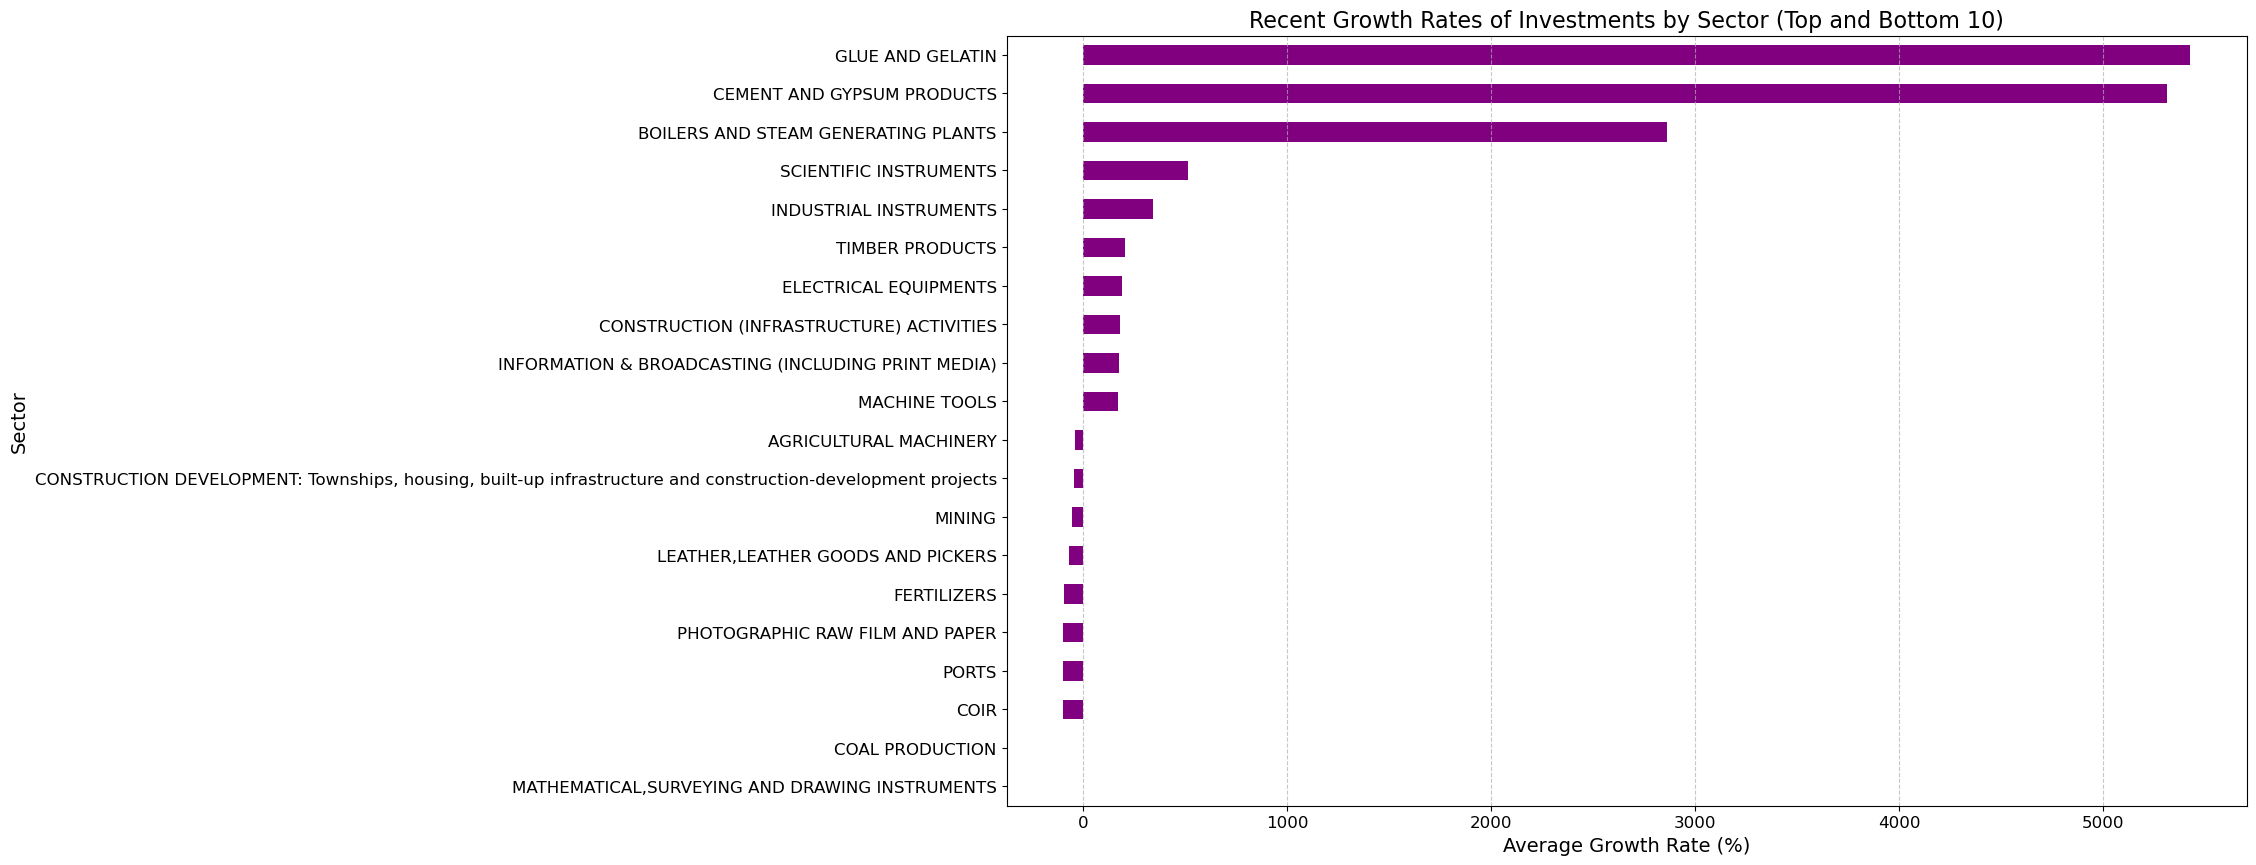

In [25]:
# Define the recent period for analysis
recent_years = ['2014-15', '2015-16', '2016-17']

# Calculate recent growth rates
recent_growth = fdi_data[['Sector'] + recent_years].set_index('Sector').pct_change(axis=1).mean(axis=1) * 100

# Sort and plot recent growth rates
recent_growth_sorted = recent_growth.sort_values(ascending=False)

# Focus on the top 10 and bottom 10 sectors to improve readability
top_bottom_sectors = pd.concat([recent_growth_sorted.head(10), recent_growth_sorted.tail(10)])

plt.figure(figsize=(16, 10))
top_bottom_sectors.plot(kind='barh', color='purple')
plt.title('Recent Growth Rates of Investments by Sector (Top and Bottom 10)', fontsize=16)
plt.xlabel('Average Growth Rate (%)', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()



## Interpretation:
1. **Top Growth Sectors**:
    - **Glue and Gelatin**: Shows the highest average growth rate, indicating a significant recent increase in FDI.
    - **Cement and Gypsum Products**: Another sector with a high growth rate, showing increased attractiveness for foreign investments.
    - **Boilers and Steam Generating Plants**: This sector also experienced substantial growth in FDI, highlighting its emerging significance.

2. **Moderate Growth Sectors**:
    - Sectors such as **Scientific Instruments**, **Industrial Instruments**, and **Timber Products** have moderate growth rates, indicating steady but significant increases in FDI.
    - **Electrical Equipments** and **Construction (Infrastructure) Activities** also show promising growth, suggesting these sectors are becoming more attractive for foreign investors.

3. **Low Growth Sectors**:
    - Sectors like **Mathematical, Surveying and Drawing Instruments**, **Coal Production**, and **Coir** have very low or negligible growth rates, indicating they are less attractive for FDI.
    - **Photographic Raw Film and Paper**, **Fertilizers**, and **Ports** are also among the bottom sectors, showing minimal growth in FDI.

## Solutions and Takeaways:
1. **Policy Focus on Emerging Sectors**:
    - For sectors showing significant FDI growth, policies should focus on sustaining and enhancing this trend. This could include providing incentives, improving infrastructure, and ensuring a favorable regulatory environment.
    - Promote these high-growth sectors through targeted marketing campaigns to attract further investments.

2. **Addressing Low Growth Sectors**:
    - For sectors with low or negligible FDI growth, it is essential to investigate the underlying reasons. This could involve understanding global trends, domestic challenges, and competitiveness issues.
    - Implement measures to make these sectors more attractive, such as introducing fiscal incentives, easing regulatory bottlenecks, and improving sector-specific infrastructure.

3. **Supporting Moderate Growth Sectors**:
    - For sectors with moderate growth, continuous support and monitoring are necessary to maintain and potentially accelerate their growth.
    - Encourage innovation and modernization within these sectors to keep them competitive and attractive for foreign investors.

4. **Strategic Diversification**:
    - Encourage diversification within both high and low-growth sectors to mitigate risks and enhance overall economic resilience.
    - Support cross-sector collaborations and initiatives that can lead to new investment opportunities and synergies.

5. **Investment Climate Enhancement**:
    - Improve the overall investment climate by ensuring political stability, robust legal frameworks, and transparent governance practices.
    - Provide comprehensive support services for foreign investors, including ease of doing business initiatives and investor facilitation centers.

## Conclusion:
The analysis of recent growth rates of investments by sector reveals significant emerging trends in FDI. High-growth sectors like Glue and Gelatin, Cement and Gypsum Products, and Boilers and Steam Generating Plants indicate emerging investment trends and require targeted support to sustain and enhance growth. Low-growth sectors need strategic interventions to improve their attractiveness, while moderate growth sectors should be supported to maintain and accelerate their growth. By focusing on these areas, policymakers can optimize FDI inflows and foster economic growth and diversification.

## Investment Stability Analysis
### Business Problem: "Which sectors have the most stable FDI inflows, and which are the most volatile?"

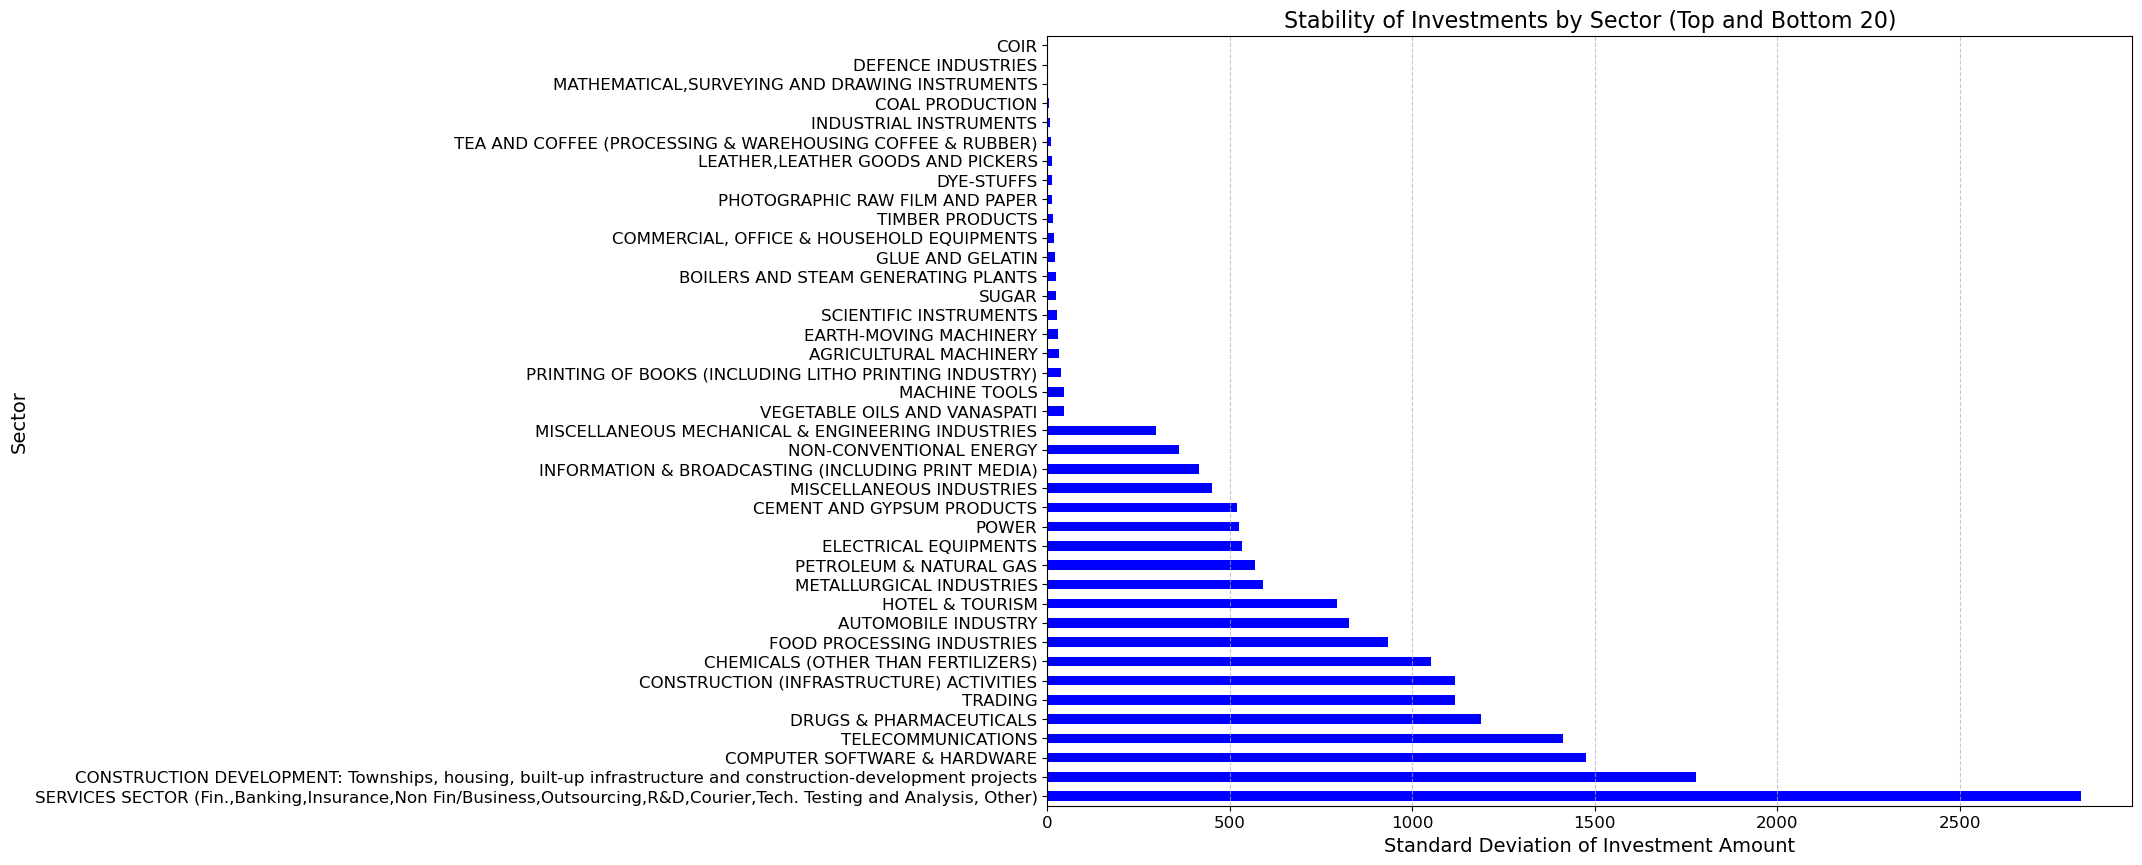

In [26]:
# Calculate standard deviation of investments for each sector
sector_stability = fdi_data.set_index('Sector').std(axis=1).sort_values()

# Focus on the top 20 and bottom 20 sectors for better readability
top_bottom_stability = pd.concat([sector_stability.head(20), sector_stability.tail(20)])

# Plot stability (lower standard deviation means higher stability)
plt.figure(figsize=(14, 10))
top_bottom_stability.plot(kind='barh', color='blue')
plt.title('Stability of Investments by Sector (Top and Bottom 20)', fontsize=16)
plt.xlabel('Standard Deviation of Investment Amount', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

## Interpretation:
1. **Most Stable Sectors**:
    - **Coir**: Exhibits the lowest standard deviation, indicating very stable FDI inflows.
    - **Defence Industries**: Another sector with low volatility, showing consistent investment patterns.
    - **Mathematical, Surveying and Drawing Instruments** and **Coal Production** also show low standard deviation, indicating stability in FDI inflows.

2. **Moderately Stable Sectors**:
    - Sectors like **Industrial Instruments**, **Photographic Raw Film and Paper**, and **Timber Products** exhibit moderate stability.
    - **Electrical Equipments** and **Cement and Gypsum Products** show a balance between stability and some degree of volatility.

3. **Most Volatile Sectors**:
    - **Construction Development** and **Services Sector** show the highest standard deviation, indicating significant volatility in FDI inflows.
    - **Telecommunications**, **Computer Software & Hardware**, and **Drugs & Pharmaceuticals** are also among the more volatile sectors.

## Solutions and Takeaways:
1. **Focus on Stability**:
    - For sectors with stable FDI inflows, continue providing a conducive environment to maintain this stability. This could include ensuring consistent policies, regulatory support, and addressing any potential risks that could destabilize investments.
    - Promote these stable sectors as safe investment opportunities to attract more foreign investors seeking low-risk ventures.

2. **Addressing Volatility**:
    - For sectors with high volatility, it is essential to investigate the factors contributing to this variability. This could involve analyzing market dynamics, global trends, regulatory changes, and economic conditions.
    - Implement strategies to mitigate volatility, such as providing long-term incentives, stabilizing regulatory frameworks, and ensuring economic predictability.

3. **Supporting Moderately Stable Sectors**:
    - For sectors with moderate stability, continuous monitoring and support are necessary to either maintain their current state or enhance stability.
    - Encourage diversification within these sectors to spread risks and reduce overall volatility.

4. **Improving Investment Climate**:
    - Enhance the overall investment climate by providing transparent and consistent policies, ensuring political stability, and fostering a favorable business environment.
    - Offer tailored support to sectors showing potential but experiencing volatility, such as specific fiscal incentives, infrastructure improvements, and targeted marketing efforts.

5. **Investor Confidence Building**:
    - Build investor confidence by showcasing success stories and stable investment opportunities within the country.
    - Provide robust support services for foreign investors, including clear guidelines, dedicated facilitation centers, and efficient dispute resolution mechanisms.

## Conclusion:
The analysis highlights sectors with varying degrees of stability in FDI inflows. Stable sectors such as Coir and Defence Industries should be promoted as safe investment havens, while volatile sectors like Construction Development and Services require targeted interventions to mitigate risks and stabilize investments. By focusing on these areas, policymakers can create a more predictable and attractive investment environment, fostering sustainable economic growth.

## Investment Concentration Analysis
### Business Problem: "How concentrated are FDI investments in a few sectors, and how has this concentration changed over time?"

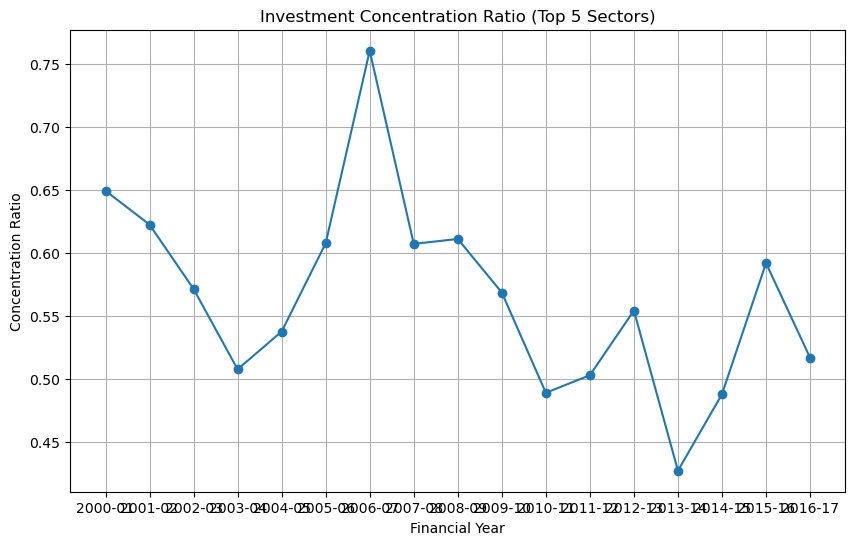

In [27]:
# Calculate yearly concentration ratio for top N sectors
top_n = 5
concentration_ratios = []

for year in fdi_data.columns[1:]:
    top_n_total = fdi_data[year].nlargest(top_n).sum()
    total = fdi_data[year].sum()
    concentration_ratios.append(top_n_total / total)

# Plot concentration ratios over time
plt.figure(figsize=(10, 6))
plt.plot(fdi_data.columns[1:], concentration_ratios, marker='o', linestyle='-')
plt.title(f'Investment Concentration Ratio (Top {top_n} Sectors)')
plt.ylabel('Concentration Ratio')
plt.xlabel('Financial Year')
plt.grid(True)
plt.show()


## Interpretation:
1. **Fluctuating Concentration Levels**:
    - The concentration ratio shows significant fluctuations over the years, indicating varying degrees of investment concentration in the top 5 sectors.
    - The ratio starts at around 0.65 in 2000-01, decreases to about 0.50 in 2003-04, peaks at approximately 0.75 in 2006-07, and then declines again with some fluctuations.

2. **Peak Concentration**:
    - The highest concentration ratio is observed in 2006-07, suggesting that during this period, FDI was heavily focused on a few sectors.
    - Post-2006-07, the concentration ratio drops significantly, indicating a diversification of investments across more sectors.

3. **Recent Trends**:
    - In the later years, particularly from 2013-14 to 2016-17, there is a downward trend with some peaks and troughs, showing that FDI concentration has generally decreased, suggesting a broader distribution of investments.

## Solutions and Takeaways:
1. **Encouraging Diversification**:
    - The decreasing trend in the concentration ratio in recent years suggests an ongoing diversification of FDI across more sectors. This trend should be encouraged through policies that promote investment in a wider range of industries.
    - Incentives for emerging and under-represented sectors can help maintain this diversification, ensuring balanced economic growth.

2. **Monitoring High Concentration Periods**:
    - Periods with high concentration ratios, like 2006-07, should be analyzed to understand the factors that led to heavy investments in a few sectors. This can provide insights into investor behavior and preferences.
    - Ensuring that such concentration does not lead to neglect of other potential growth sectors is essential for balanced development.

3. **Policy Adjustments**:
    - Policies should be adjusted to maintain a healthy balance between attracting substantial investments to key sectors and encouraging spread across diverse industries.
    - Continuous review and adaptation of FDI policies based on sector performance and global investment trends are crucial.

4. **Sector-Specific Strategies**:
    - For sectors consistently attracting high FDI, ensure they have the infrastructure and regulatory support needed to sustain and grow these investments.
    - For sectors with lower FDI, identify barriers and implement strategies to make them more attractive to foreign investors.

5. **Enhancing Investment Climate**:
    - Foster a favorable investment climate by ensuring political stability, transparent governance, and efficient regulatory practices.
    - Promote the country's diverse investment opportunities through international roadshows, investor summits, and targeted marketing campaigns.

## Conclusion:
The analysis of the Investment Concentration Ratio over the years reveals fluctuations in how concentrated FDI investments have been within the top 5 sectors. The trend towards decreasing concentration in recent years indicates positive diversification, which should be further encouraged through targeted policies and incentives. Monitoring periods of high concentration and ensuring balanced growth across sectors will help in sustaining a robust and diversified economic environment attractive to foreign investors.